# Project: Tmbd Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The Movie Database (TMDb) is originally taken from Kaggle. The data contains information about cast, director, keywords, runtime, genres, ratings, popularity and revenue. Ratings, popularity and revenue,these attirbutes can be used to analyse and understand the properties of the data set.

### Questions to answer
>1. Which year has the highest release of movies?<br>
>2. Which movie has the highest and lowest profit?<br>
>3. Which attributes contribute towards popularity of a movie?<br>
>4. Popularity over the years.<br>
>5. What kinds of properties are associated with movies that have high revenues?<br>
>6. Genre trends based over generations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

>There are totally 10866 rows and 21 columns in the dataset.

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='describe'></a>
> The describe function helps summarising the rows across each column. For example, popularity shows there are max value is 32.98 where in the IQR is between 0.2-0.7. But the popularity is a cumulative calculation based on user likes, views, ratings and there is no upper or lower bound.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

>We know that there are 10866 total number of rows in the table. The above stats shows that imdb_id, cast, homepage,tagline, keywords, director, overview, genres, production_companies have missing values in them. However, homepage and tagline have many missing values and these attributes don't help answering any of our questions. Hence we can drop these columns. 

In [6]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

>The attributes cast, director, genres have fewer NA values and those rows can be dropped

In [7]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

> These function helps us understand the dtatypes of the attributes and change them for processing the data to answer our questions.<br>
>  We can see that release_date is an object type but should be a datetime type.

#### Gathering the total number of zeroes in budget, revenue and runtime.
>While exploring dataset in excel, budget and revenue had alot of zero values in them, however movies cannot be made without a budget and there will always be minimum revenue generated through the movie. The next step is to decide whether to keep these values or drop them as it would reduce the number of rows for analysis and might not provide appropriate results.

In [8]:
#counting the number of zero values in budget
print('Number of zeroes in budget:',df.groupby('budget').count()['id'][0])

Number of zeroes in budget: 5696


In [9]:
#counting the number of zero values in revenue
print('Number of zeroes in revenue:',df.groupby('revenue').count()['id'][0])

Number of zeroes in revenue: 6016


> Considering large number of values are zero, we can assign them NA and drop them.

In [10]:
#counting the number of zero values in runtime
print('Number of zeroes in runtime:',df.groupby('runtime').count()['id'][0])

Number of zeroes in runtime: 31


> The number of zeroes in this column is 31, hence we can drop them and it won't affect our analysis.

#### Duplicates in the dataset

In [11]:
sum(df.duplicated())

1

>There is just one duplicate row in the entire dataset. We can drop this row.

##### Data cleaning summary
>Based on the analysis above, here are the cleaning conclusions:
>1. Drop redundant columns that are redundant to answer our questions : imdb_id, overview, homepage, tagline, budget_adj, revenue_adj. <br> 
>2. Drop duplicate rows. <br> 
>3. Replace zero values with null values in the budget, revenue and  runtime.
>4. Drop corresponding null value rows of cast, director, genres, budget, revenue and  runtime.
>5. Convert release_date type to datetime type.
>6. Split all columns with | in their values and store them in different columns.

## Data Cleaning

#### 1. Dropping redundant columns that are redundant to answer our questions 

In [12]:
#1. Dropping redundant columns that are redundant to answer our questions : imdb_id, overview, homepage, tagline, budget_adj, revenue_adj.
drop_columns = ['imdb_id','overview', 'homepage','tagline','budget_adj','revenue_adj']
df.drop(drop_columns, axis=1, inplace=True)
#Verify if the columns are dropped
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


#### 2. Drop duplicate rows.

In [13]:
#2. Drop duplicate rows.
df.drop_duplicates(inplace=True)

#Verify if all duplicates are dropped.
sum(df.duplicated())

0

#### 3. Replace zero values with null values in the budget, revenue and  runtime.

In [14]:
#3. Replace zero values with null values in the budget, revenue and  runtime.
cols = ['budget','revenue','runtime']
df[cols] = df[cols].replace(0, np.nan)

#### 4. Drop corresponding null value rows of budget, revenue and  runtime.

In [15]:
#4. Drop corresponding null value rows of budget, revenue and  runtime.
check_na=['budget','revenue','runtime','cast','director','genres']
df.dropna(subset = check_na, inplace = True)
#To verify if all the values are dropped from the corresponding columns
df.isna().sum()

id                        0
popularity                0
budget                    0
revenue                   0
original_title            0
cast                      0
director                  0
keywords                136
runtime                   0
genres                    0
production_companies     44
release_date              0
vote_count                0
vote_average              0
release_year              0
dtype: int64

#### 5. Convert release_date type to datetime type.

In [16]:
#5. Convert release_date type to datetime type.
df['release_date'] =  pd.to_datetime(df['release_date'])

#To verify release_date type
df.dtypes

id                               int64
popularity                     float64
budget                         float64
revenue                        float64
original_title                  object
cast                            object
director                        object
keywords                        object
runtime                        float64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
dtype: object

#### 6. Splitting all columns with | in their values and store them in different columns.

In [17]:
#6. Splitting all columns with | in their values and store them in different columns.
#Split cast, directors, keywords, genres, prodcution_company into separate columns
df_cast = (df['cast'].str.split('|', expand=True).rename(columns=lambda x: f"cast_{x+1}"))
df_director = (df['director'].str.split('|', expand=True).rename(columns=lambda x: f"director_{x+1}"))
df_keywords = (df['keywords'].str.split('|', expand=True).rename(columns=lambda x: f"keywords_{x+1}"))
df_genres = (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))
df_production = (df['production_companies'].str.split('|', expand=True).rename(columns=lambda x: f"production_companies_{x+1}"))


#joining all the split columns and dropping the old ones
df = df.join([df_cast, df_director, df_keywords, df_genres, df_production])
df = df.drop(['cast', 'keywords', 'director', 'genres', 'production_companies'], axis=1)

#Verifying if all columns are added as desired
df.head(1)

,id,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,...,genres_1,genres_2,genres_3,genres_4,genres_5,production_companies_1,production_companies_2,production_companies_3,production_companies_4,production_companies_5
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,2015-06-09,5562,6.5,2015,...,Action,Adventure,Science Fiction,Thriller,None,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu


## Exploratory Data Analysis

#### 1. Which year has the highest release of movies?

Year with highest released movies: release_year
2011    199
Name: original_title, dtype: int64


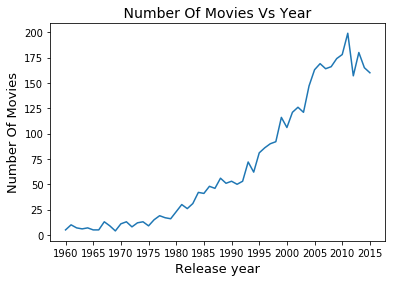

In [18]:
#1. Which year has the highest release of movies?
print('Year with highest released movies:',df.groupby('release_year').count()['original_title'].sort_values().tail(1))

#Plotting Release year vs number of movies.
df.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))

#set the figure size and labels
sns.set(rc={'figure.figsize':(10,5)})
plt.title(" Number Of Movies Vs Year ",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
#set the style sheet
sns.set_style("whitegrid")

> The number of movies released per year increases over time, with 2011 having the highest number of movies - 199.

#### 2. Which movie has the highest  and lowest profit?

In [19]:
df['profit'] = df['revenue']- df['budget']
#2. Which movie has The highest profit?
print('Movie with highest profit:')
print(df[['original_title','profit', 'popularity']].sort_values('profit').tail(1))

#3. Which movie has the lowest profit? Top 10 movies which earn highest profit?Top 10 movies which earn highest profit?
print('Movie with highest profit:')
print(df[['original_title','profit','popularity']].sort_values('profit').head(1))

Movie with highest profit:
     original_title        profit  popularity
1386         Avatar  2.544506e+09    9.432768
Movie with highest profit:
         original_title       profit  popularity
2244  The Warrior's Way -413912431.0     0.25054


> The movie with hight profit is 'Avatar' and the movie with the lowesr profit is 'The Warrior's Way' 

#### 3. Which attributes contribute towards popularity of a movie?

In [20]:
df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit
id,1.000000,0.189039,-0.027430,-0.003238,-0.035191,0.111551,-0.000721,0.489943,0.003890
popularity,0.189039,1.000000,0.446563,0.615348,0.215510,0.779986,0.317750,0.173599,0.596080
budget,-0.027430,0.446563,1.000000,0.688403,0.261489,0.556681,0.023638,0.268464,0.526660
revenue,-0.003238,0.615348,0.688403,1.000000,0.250728,0.754466,0.227071,0.139316,0.979138
runtime,-0.035191,0.215510,0.261489,0.250728,1.000000,0.274215,0.352615,-0.112954,0.220597
vote_count,0.111551,0.779986,0.556681,0.754466,0.274215,1.000000,0.387262,0.207462,0.728276
vote_average,-0.000721,0.317750,0.023638,0.227071,0.352615,0.387262,1.000000,-0.133315,0.259503
release_year,0.489943,0.173599,0.268464,0.139316,-0.112954,0.207462,-0.133315,1.000000,0.088069
profit,0.003890,0.596080,0.526660,0.979138,0.220597,0.728276,0.259503,0.088069,1.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb472304b70>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fb472131e10>], dtype=object)

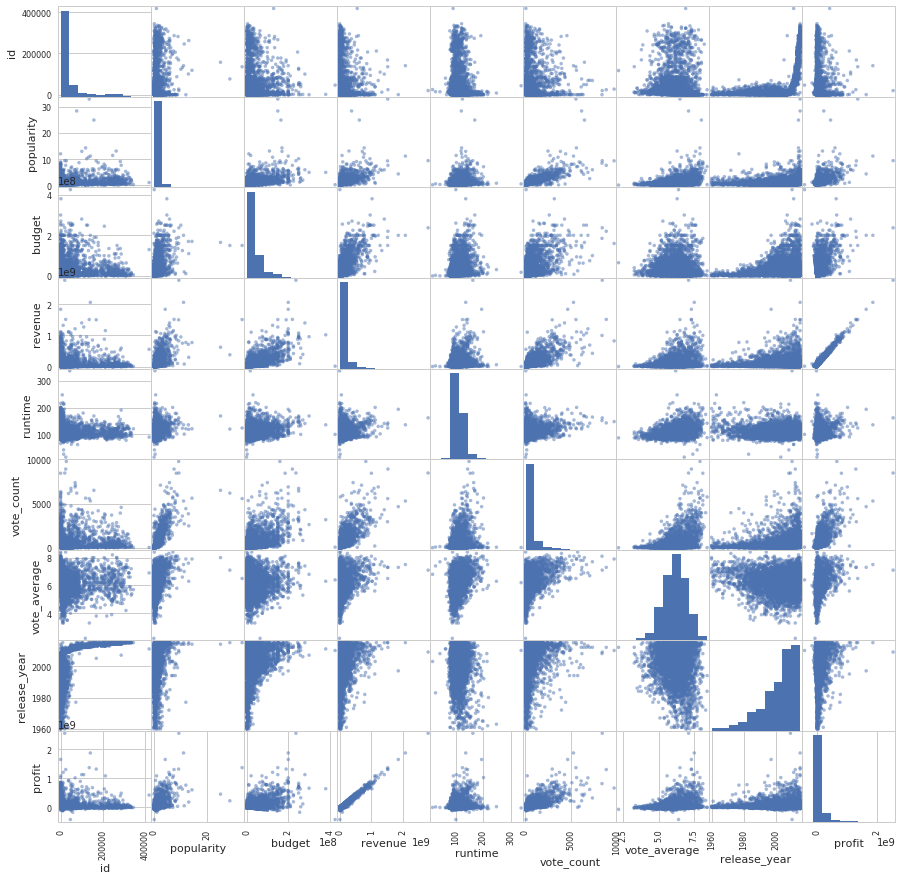

In [21]:
pd.plotting.scatter_matrix(df, figsize=(15,15))[-1]

>We can see that budget, revenue, vote_count, vote_average and release_year contribute to the popularity of the movie. 

#### 4. Popularity over the years.

In [22]:
popularity_mean = df.groupby('release_year').mean()['popularity']
popularity_mean.tail()

release_year
2011    1.202357
2012    1.417230
2013    1.398382
2014    2.523676
2015    2.856943
Name: popularity, dtype: float64

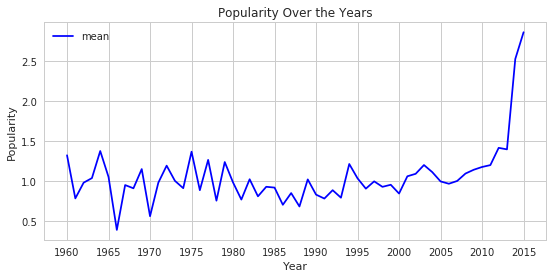

In [23]:

#set style
sns.set_style('whitegrid')
#set x, y axis data
#x1, y1 for mean data; x2, y2 for median data
x1, y1 = popularity_mean.index, popularity_mean

#set size
plt.figure(figsize=(9, 4))
#plot line chart for mean and median
plt.plot( x1 , y1, color = 'b', label = 'mean')
plt.xticks(np.arange(1960,2016,5))

#set title and labels
plt.title('Popularity Over the Years')
plt.xlabel('Year')
plt.ylabel('Popularity');
#set legend
plt.legend(loc='upper left')

>We can see that the popularity trend is rapidly moving up by the year with sudden increase in 2015.

#### 5. What kinds of properties are associated with movies that have high revenues?

> We divide the revenues into four levels very-low, low, medium, high and try assosciate all the attributes that contribute towards generating high revenue.

In [24]:
# View the min, 25%, 50%, 75%, max revenue values with Pandas describe
df.describe().revenue

count    3.849000e+03
mean     1.078148e+08
std      1.766175e+08
min      2.000000e+00
25%      1.367069e+07
50%      4.490726e+07
75%      1.243052e+08
max      2.781506e+09
Name: revenue, dtype: float64

In [25]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [2.000000e+00, 1.367069e+07, 4.490726e+07, 1.243052e+08, 2.781506e+09] # Fill in this list with five values you just found
# Labels for the four revenue level groups
bin_names = ['very low', 'low', 'medium', 'high'] # Name each revenue level category
df['revenue_levels']=pd.cut(df['revenue'], bin_edges, labels=bin_names)
df.head()

,id,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,...,genres_3,genres_4,genres_5,production_companies_1,production_companies_2,production_companies_3,production_companies_4,production_companies_5,profit,revenue_levels
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,2015-06-09,5562,6.5,2015,...,Science Fiction,Thriller,None,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu,1.363529e+09,high
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,2015-05-13,6185,7.1,2015,...,Science Fiction,Thriller,None,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None,2.284364e+08,high
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,2015-03-18,2480,6.3,2015,...,Thriller,None,None,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None,1.852382e+08,high
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136.0,2015-12-15,5292,7.5,2015,...,Science Fiction,Fantasy,None,Lucasfilm,Truenorth Productions,Bad Robot,None,None,1.868178e+09,high
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,137.0,2015-04-01,2947,7.3,2015,...,Thriller,None,None,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films,1.316249e+09,high


In [26]:
#revenue_levels stored in as a list to be used in a loop for classification
revenue_levels = df['revenue_levels'].unique().tolist()
del revenue_levels[-1]
print(revenue_levels)

['high', 'low', 'medium', 'very low']


In [27]:
#Creating a dictionary of all the relevant attributes to see what factors contribute for a given revenue_level.

movie_dictionary = {}

for level in revenue_levels:
    
    #group data based on each level
    grouped_data = df[df['revenue_levels'] == level]
    
    '''We group attributes - director, cast, genres, production companies, release_year based 
       on their revenue level and find the frequently occuring entities in the given revenue-level.
    '''
    #Director
    director = grouped_data.loc[:, 'director_1': 'director_6']
    director_frequency = director.stack().value_counts().idxmax()
    
    #Cast
    cast = grouped_data.loc[:, 'cast_1': 'cast_5']
    cast_frequency = cast.stack().value_counts().idxmax()
    
    #Genres
    genre =  grouped_data.loc[:, 'genres_1': 'genres_5']
    genre_frequncy = genre.stack().value_counts().idxmax()
    
    #Production Companies
    production_companies =  grouped_data.loc[:, 'production_companies_1': 'production_companies_5']
    production_companies_frequency = production_companies.stack().value_counts().idxmax()
    
    #Release Year
    release_year_frequency = grouped_data['release_year'].value_counts().idxmax()
    
    '''Calculating mean for runtime, budget, vote, popularity for given levels'''
    #average section
    mean_runtime = grouped_data['runtime'].mean()
    mean_budget = grouped_data['budget'].mean()
    mean_votes = grouped_data['vote_average'].mean()
    mean_popularity = grouped_data['popularity'].mean()
    
    #creating nested dictionary
    movie_dictionary[level] = {'Frequently occruring director' : director_frequency,
                                'Frequently occruring cast' : cast_frequency,
                                'Frequently occruring genres' : genre_frequncy,
                                'Frequentl release years' : release_year_frequency,
                                'Frequently occruring production companies' : production_companies_frequency,
                                'Mean of Runtime' : mean_runtime,
                                'Mean of Budget' : mean_budget, 
                                'Mean of Vote' : mean_votes,
                                'Mean of Popularity': mean_popularity
                               }

In [28]:
#Storing the dictionary into a dataframe
Movie_stats = pd.DataFrame.from_dict(movie_dictionary, orient='index')
Movie_stats

,Frequently occruring director,Frequently occruring cast,Frequently occruring genres,Frequentl release years,Frequently occruring production companies,Mean of Runtime,Mean of Budget,Mean of Vote,Mean of Popularity
high,Steven Spielberg,Tom Cruise,Action,2011,Universal Pictures,116.161123,7.912546e+07,6.400624,2.325880
low,Wes Craven,Robert De Niro,Drama,2006,Universal Pictures,106.895010,2.225665e+07,6.085135,0.780783
medium,Clint Eastwood,Bruce Willis,Drama,2005,Warner Bros.,110.010395,3.527819e+07,6.197193,1.131079
very low,Woody Allen,Willem Dafoe,Drama,2011,Paramount Pictures,103.829344,1.237425e+07,5.990739,0.534731


#### 6. Genre trends based over generations.

> We are trying to analyse the genre preference based on the generation - 1960s, 1970s, 1980s, 1990s, 2000s, 2010,

In [29]:
df_genres = df[['release_year','genres_1','genres_2','genres_3','genres_4','genres_5']].copy()

In [30]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [1959, 1969,1979,1989,1999,2009,2019] # Fill in this list with five values you just found
# Labels for the four revenue level groups
bin_names = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s'] # Name each revenue level category
df_genres['generation']=pd.cut(df['release_year'], bin_edges, labels=bin_names)

In [31]:
df_genres[df['release_year']==1965].tail(5)

,release_year,genres_1,genres_2,genres_3,genres_4,genres_5,generation
10689,1965,Adventure,Action,Thriller,None,None,1960s
10690,1965,Drama,Family,Music,Romance,None,1960s
10691,1965,Drama,Romance,War,None,None,1960s
10692,1965,Action,Adventure,Comedy,None,None,1960s
10716,1965,Drama,History,None,None,None,1960s


In [32]:
#revenue_levels stored in as a list to be used in a loop for classification
generation_levels = df_genres['generation'].unique().tolist()
print(generation_levels)

['2010s', '1970s', '2000s', '1990s', '1980s', '1960s']


In [33]:
#Creating a dictionary to calculate frequncy of each genre in each generation, 
#and calculating the highest number of movies from a given genre.

genre_frequncy = {}
genre_frequency_max = {}

for level in generation_levels:
    
    #group data based on each level
    grouped_data = df_genres[df_genres['generation'] == level]
    
    '''We group attributes -  genres based on their generation levels and
       find the frequently occuring entities and maximum in the given generation_level.
    '''
    #Genres
    genre =  grouped_data.loc[:, 'genres_1': 'genres_5']
    genre_frequncy.update({level : genre.stack().value_counts()})
    genre_frequency_max[level]={genre.stack().value_counts().idxmax():genre.stack().value_counts().max()}


In [34]:
#storing the dictionary into dataframe of value counts for each genre in each generation.
genre_dictionary = pd.DataFrame.from_dict(genre_frequncy, orient='index')
genre_dictionary


,Drama,Comedy,Thriller,Action,Adventure,Crime,Romance,Science Fiction,Horror,Family,Fantasy,Animation,Mystery,Music,War,History,Western,Documentary,Foreign,TV Movie
1960s,41,16,14,19,23,9,15,4,4,8,2,2,7,8,9,9,8,NaN,NaN,NaN
1970s,67,25,45,43,32,27,12,27,19,9,9,6,13,8,8,6,4,NaN,NaN,NaN
1980s,145,148,108,113,87,56,69,79,88,40,53,10,23,18,15,15,4,1.0,2.0,NaN
1990s,354,280,270,229,141,160,136,114,88,80,85,28,86,17,17,22,11,3.0,2.0,1.0
2000s,667,546,453,400,282,248,284,168,152,184,149,87,147,48,44,51,14,18.0,5.0,NaN
2010s,479,342,313,281,184,151,150,127,112,104,98,68,68,35,26,26,11,9.0,3.0,NaN


In [35]:
#storing the dictionary into dataframe of maximum value counts of a genre in each generation.
genre_max_df = pd.DataFrame.from_dict(genre_frequency_max, orient='index')
genre_max_df

,Drama,Comedy
1960s,41.0,NaN
1970s,67.0,NaN
1980s,NaN,148.0
1990s,354.0,NaN
2000s,667.0,NaN
2010s,479.0,NaN


In [ ]:
#Visualising the results obtained using a bar graph
# Setting the positions
genre_max_df.plot(kind='bar')
# title and labels
plt.ylabel('Frequency')
plt.xlabel('Generations')
plt.title('Genre trend over generations')

# legend
plt.legend()

<a id='conclusions'></a>
## Conclusions

> Question 1: We can say that number of movies increased with every passing year. It implies that as the accessibility to watch movies improved over the years with new technology. The number of movies being made increased to meet the demand. 2011 had the highest number of movies estimated at 199.<br>
> Question 2: Here we calculated the profit by subtracting budget from revenue. The movie with the highest profit is 'Avatar' with a profit of 2.544506e+09 and popularity of 9.432768 and 'The Warrior's Way' at a loss of -413912431.0 and popularity of 0.25054. This shows the if a movie's poplularity rating is good, it is bound to be profitable.<br>
> Question 3: We can see that budget, revenue, vote_count, vote_average and release_year contribute to the popularity of the movie. All these factors show the basis of a movies popularity. This form recommendation system for the audience to pick a movie to watch and rate them.<br>
> Question 4: We can see that the popularity trend is rapidly moving up by the year with sudden increase in 2015, this shows that over the years technology has improved accessibility which enables people to watch movies through different sources and rate them. This can help movie makers to analyse the trend and preference of audience to make movies with respect to current trends.<br>
> Question 5: We know that revenue is straight forward indicator for a successful movie, however it's important to understand what attributes and values lead to a successful movie. Here we identify the frequenty occuring director, cast, genres, production companies, release_year and Calculating mean for runtime, budget, vote, popularity for each of the levels - very-low, low, medium and high. Based on these factors we can see that action movies, high budget, longer runtime, higher popularity play a role in making movies that produce high revenues.<br>
Question 6: we try to analyse the genre preference for each generation - 1960s, 1970s, 1980s, 1990s, 2000s, 2010s and Drama seems to be the popular choice over the period of time and comedy taking the second place in the list.

## Limitations
Results obtained are limited to the given data set, hence these results cannot be generalised to a similar data set. The results can be indicators to an output but not necessarily the only probable attributes. Large chunk of data was filtered becuase of null values and results may vary the number of rows change.
During the data cleaning process, data with '|' were split into different columns and increasing the time taken fir calculation.



In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])